In [1]:
import pandas as pd
A = pd.read_csv("E:/Data Science class/Datasets/Credit.csv")

In [2]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


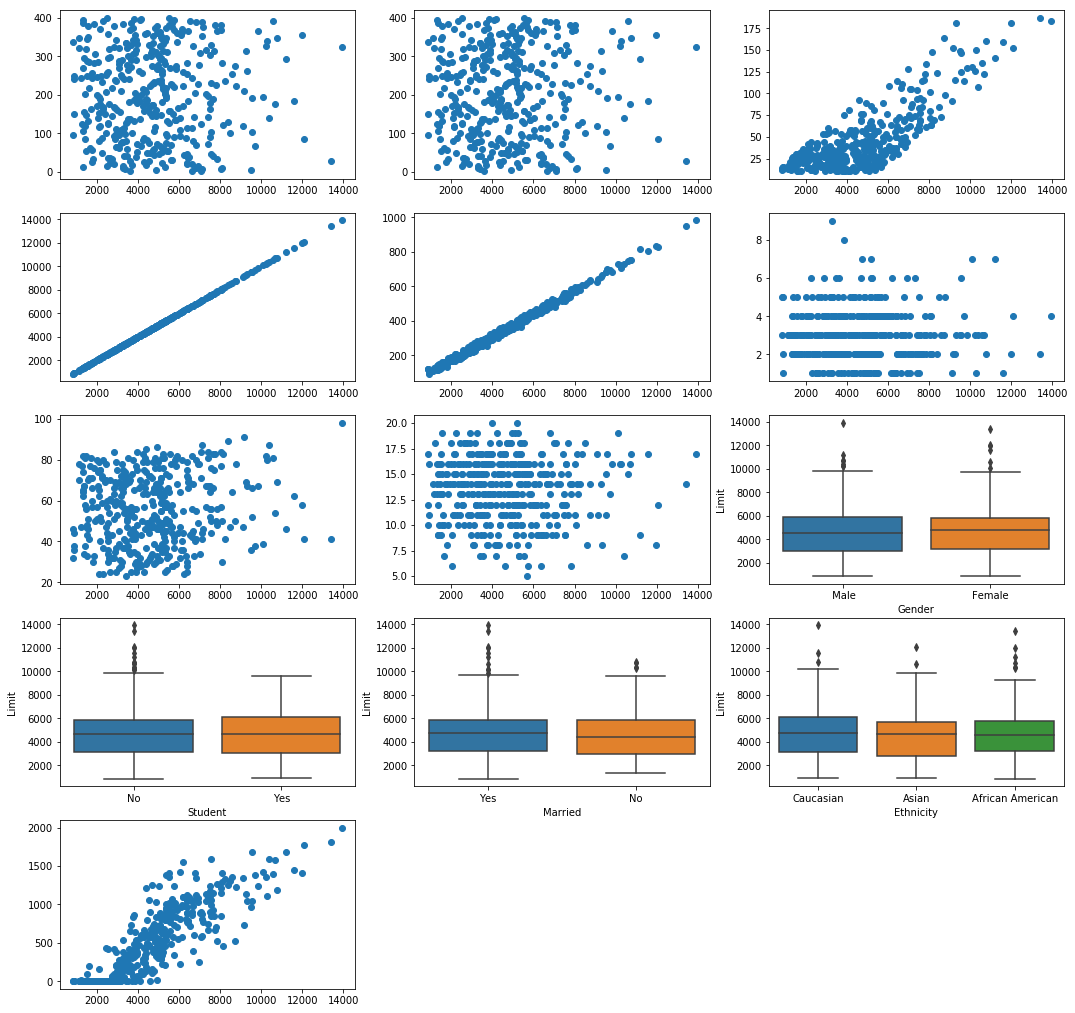

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(18,18))
m = 1
for i in A.columns:
   if(A[i].dtypes=="object"):
       plt.subplot(5,3,m)
       sb.boxplot(A[i],A.Limit)
       m = m+1
   else:
       plt.subplot(5,3,m)
       plt.scatter(A.Limit,A[i])
       m = m+1

In [6]:
Y = A[["Limit"]]
X = A.drop(labels=["Unnamed: 0","ID","Limit"],axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [8]:
import numpy as np
np.mean(A.Income)

45.218885000000036

In [9]:
np.std(A.Income)

35.20019025455366

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [11]:
for i in range(2,20,1):
   from sklearn.neighbors import KNeighborsRegressor
   knr = KNeighborsRegressor(n_neighbors=i)
   model = knr.fit(xtrain,ytrain)
   pred = model.predict(xtest)
   from sklearn.metrics import mean_absolute_error
   print("if k = %d then MAE is %.2f"%(i,mean_absolute_error(ytest,pred)))

if k = 2 then MAE is 628.16
if k = 3 then MAE is 583.38
if k = 4 then MAE is 631.41
if k = 5 then MAE is 577.47
if k = 6 then MAE is 547.49
if k = 7 then MAE is 523.19
if k = 8 then MAE is 537.91
if k = 9 then MAE is 523.49
if k = 10 then MAE is 517.06
if k = 11 then MAE is 508.16
if k = 12 then MAE is 503.95
if k = 13 then MAE is 496.26
if k = 14 then MAE is 501.04
if k = 15 then MAE is 497.60
if k = 16 then MAE is 492.82
if k = 17 then MAE is 508.50
if k = 18 then MAE is 517.94
if k = 19 then MAE is 507.97


In [12]:
from sklearn.model_selection import GridSearchCV
tp = {"n_neighbors":range(2,20,1)}
knr = KNeighborsRegressor()

In [13]:
cv = GridSearchCV(knr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(X,Y)
cvmodel.best_params_

{'n_neighbors': 16}

In [14]:
knr = KNeighborsRegressor(n_neighbors=16)
model = knr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
print("MAE is %.2f"%(mean_absolute_error(ytest,pred)))

MAE is 492.82
